In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
import plotly.express as px
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout 
from keras.layers import LSTM 
from keras.layers.convolutional import MaxPooling1D, Conv1D
from keras.regularizers import l1
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau, ModelCheckpoint

2023-03-29 17:32:38.810492: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-29 17:32:38.856982: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-29 17:32:38.858030: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 17:32:40.090040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data PrePROSASSING

In [2]:
import glob
all_f= glob.glob('../'+'DataSets/'+'*/'+'*/'+'*_INDEX_*.csv')
all_f

['../DataSets/RAJASTHAN/BHIWADI/H_Bhiw_1_12_17-2_12_22-*01* (copy)_INDEX_Mean.csv',
 '../DataSets/RAJASTHAN/JODHPUR/H_Jodh_1_12_15-2_12_22-*10* (copy)_INDEX_Mean.csv',
 '../DataSets/MADHYA_PRADESH/SINGRAULI/H_Sing_1_12_17-2_12_22-*48* (copy)_INDEX_Mean.csv',
 '../DataSets/GUJARAT/ANKLESHWAR/H_Ankl_1_2_19-3_12_22-*41* (copy)_INDEX_Mean.csv',
 '../DataSets/PUNJAB/LUDHIANA/H_Ludh_1_5_17-_2_12_22-*07* (copy)_INDEX_Mean.csv',
 '../DataSets/WEST_BENGAL/DURGAPUR/H_Durg_1_12_17-2_12_22-*58* (copy)_INDEX_Median.csv',
 '../DataSets/HARYANA/YAMUNA_NAGAR/H_Yamu_1_1_19-2_12_22-*30* (copy)_INDEX_Mean.csv',
 '../DataSets/HARYANA/CHARKHI_DADRI/H_Char_1_3_20-2_12_22-*58* (copy)_INDEX_Mean.csv',
 '../DataSets/HARYANA/JIND/H_Jind_1_1_19-2_12_22-*56* (copy)_INDEX_Median.csv',
 '../DataSets/HARYANA/KURUKSHETRA/H_Kuru_1_1_19-2_12_12-*48* (copy)_INDEX_Mean.csv',
 '../DataSets/HARYANA/SONIPAT/H_Soni_1_1_19-2_12_22-*21* (copy)_INDEX_Mean.csv',
 '../DataSets/HARYANA/DHARUHERA/H_Dhar_1_1_19-2_12_22-*43* (copy)_I

In [3]:
li=[]
for file_name in all_f:
    df=pd.read_csv(file_name)
    li.append(df)


In [4]:
s_n=2
df=li[s_n]
df,all_f[s_n]

(                      DATE   PM2.5
 0      2017-12-08 11:00:00  131.67
 1      2017-12-08 12:00:00   92.00
 2      2017-12-08 13:00:00   62.50
 3      2017-12-08 14:00:00   50.00
 4      2017-12-08 15:00:00   35.00
 ...                    ...     ...
 43690  2022-12-02 21:00:00  377.75
 43691  2022-12-02 22:00:00  258.50
 43692  2022-12-02 23:00:00  228.25
 43693  2022-12-03 00:00:00  199.50
 43694  2022-12-03 01:00:00  179.75
 
 [43695 rows x 2 columns],
 '../DataSets/MADHYA_PRADESH/SINGRAULI/H_Sing_1_12_17-2_12_22-*48* (copy)_INDEX_Mean.csv')

In [5]:
#df = pd.read_csv('../../../../GitHub/Ds/PUNJAB/LUDHIANA/H_Ludh_1_5_17-_2_12_22-*07* (copy)_INDEX_Mean.csv')
#df
v=all_f[s_n].split(r"/")
#u=v[3].split(r' ')
Pre_Ds=v[0]+'/'+'Results/'+v[2]+'/'+v[3]+'/'
Pre_Ds

'../Results/MADHYA_PRADESH/SINGRAULI/'

In [6]:
#df=df.iloc[-26304:,:]
df['DATE']=pd.to_datetime(df['DATE'])
df=df.rename(columns={'PM2.5':'PM'})
df['PM']=df['PM'].astype('float32')
df=df.reset_index()
df=df.drop(['index'], axis = 1) 
#df.drop(['level_0'], axis = 1, inplace = True) 
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43695 entries, 0 to 43694
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    43695 non-null  datetime64[ns]
 1   PM      43695 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 512.2 KB


DATE          PM
0     2017-12-08 11:00:00  131.669998
1     2017-12-08 12:00:00   92.000000
2     2017-12-08 13:00:00   62.500000
3     2017-12-08 14:00:00   50.000000
4     2017-12-08 15:00:00   35.000000
...                   ...         ...
43690 2022-12-02 21:00:00  377.750000
43691 2022-12-02 22:00:00  258.500000
43692 2022-12-02 23:00:00  228.250000
43693 2022-12-03 00:00:00  199.500000
43694 2022-12-03 01:00:00  179.750000

[43695 rows x 2 columns]

In [7]:
df.set_index('DATE',inplace = True)

In [8]:
values=df.values
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(values)

In [9]:
train,test=train_test_split(scaled,test_size=0.30,shuffle=False)
train_target=train[:]
test_target=test[:]
train_target.shape,test_target.shape

((30586, 1), (13109, 1))

In [10]:
n_input = 24
n_features =1
b_size=10
train_generator = TimeseriesGenerator(train, train_target, length = n_input, batch_size=b_size)
print(len(train),len(train_generator))

x,y=train_generator[50]

test_genrator = TimeseriesGenerator(test,test_target,length= n_input,batch_size=b_size)
print(len(test),len(test_genrator))
test_genrator[0][0],test_genrator[0][1]

x,y = test_genrator[0]

print(x.shape,y.shape,test.shape)

30586 3057
13109 1309
(10, 24, 1) (10, 1) (13109, 1)


In [11]:
# attention define by the machine learning mastery
import keras.backend as K
from keras.layers import Layer

# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [12]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# BiLSTM


In [13]:
def my_checkpoint(Model):
    mc = ModelCheckpoint('Model_' +'best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    return mc

In [14]:
mc=my_checkpoint(LSTM)

In [15]:
model = tf.keras.models.Sequential()
model.add(Bidirectional(LSTM(250, activation='relu', return_sequences=False, bias_regularizer=l1(0.05)), input_shape=(n_input , n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
rms_prop = RMSprop(learning_rate=0.002)
model.compile(optimizer=rms_prop, loss='mse')
model.summary()
print('Train...')
history = model.fit(train_generator, validation_data=train_generator,  epochs=500, steps_per_epoch=32, shuffle=True, callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 500)              504000    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense (Dense)               (None, 1)                 501       
                                                                 
Total params: 504,501
Trainable params: 504,501
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/500


2023-03-29 17:32:42.471039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - ETA: 0s - loss: 23.9404

2023-03-29 17:32:47.525495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 35s 1s/step - loss: 23.9404 - val_loss: 23.0287
Epoch 2/500
32/32 [==============================] - 33s 1s/step - loss: 22.2374 - val_loss: 21.4217
Epoch 3/500
32/32 [==============================] - 32s 1s/step - loss: 20.6347 - val_loss: 19.8238
Epoch 4/500
32/32 [==============================] - 36s 1s/step - loss: 19.0383 - val_loss: 18.2247
Epoch 5/500
32/32 [==============================] - 34s 1s/step - loss: 17.4378 - val_loss: 16.6247
Epoch 6/500
32/32 [==============================] - 34s 1s/step - loss: 15.8363 - val_loss: 15.0246
Epoch 7/500
32/32 [==============================] - 34s 1s/step - loss: 14.2381 - val_loss: 13.4258
Epoch 8/500
32/32 [==============================] - 34s 1s/step - loss: 12.6381 - val_loss: 11.8257
Epoch 9/500
32/32 [==============================] - 34s 1s/step - loss: 11.0388 - val_loss: 10.2267
Epoch 10/500
32/32 [==============================] - 35s 1s/step - loss: 9.4386 - val_loss: 8.6267
Epo

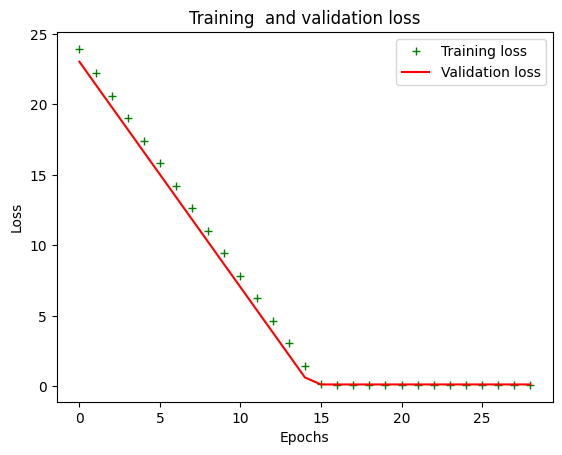

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, 'g+', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training  and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
prediction=model.predict(train_generator)
prediction.shape

2023-03-29 17:49:17.498159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3057/3057 [==============================] - 43s 14ms/step


(30562, 1)

In [18]:
from keras.layers import concatenate
print(train.shape)
test1=train[n_input:,:]
print(test1.shape,type(test1))
print(type(prediction))
prediction1= concatenate((prediction,test1),axis=1)


(30586, 1)
(30562, 1) <class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
rescaled_prediction = scaler.inverse_transform(prediction1)
print('rescaled_prediction shape', rescaled_prediction.shape)
#print(rescaled_prediction[-5:,0])
#print(rescaled_prediction[:,0])
rescaled_prediction_pollution=rescaled_prediction[:len(rescaled_prediction),0]
print(rescaled_prediction_pollution.shape)

test_data_actual_scale=scaler.inverse_transform(train)
print('test_data_actual_scale shape', test_data_actual_scale.shape)
test_data_actual_pollution=test_data_actual_scale[22:len(rescaled_prediction)+22,0]
#test_data_actual_pollution=test_data_actual_scale[0:30,0]
print(test_data_actual_pollution.shape)

rescaled_prediction shape (30562, 2)
(30562,)
test_data_actual_scale shape (30586, 1)
(30562,)


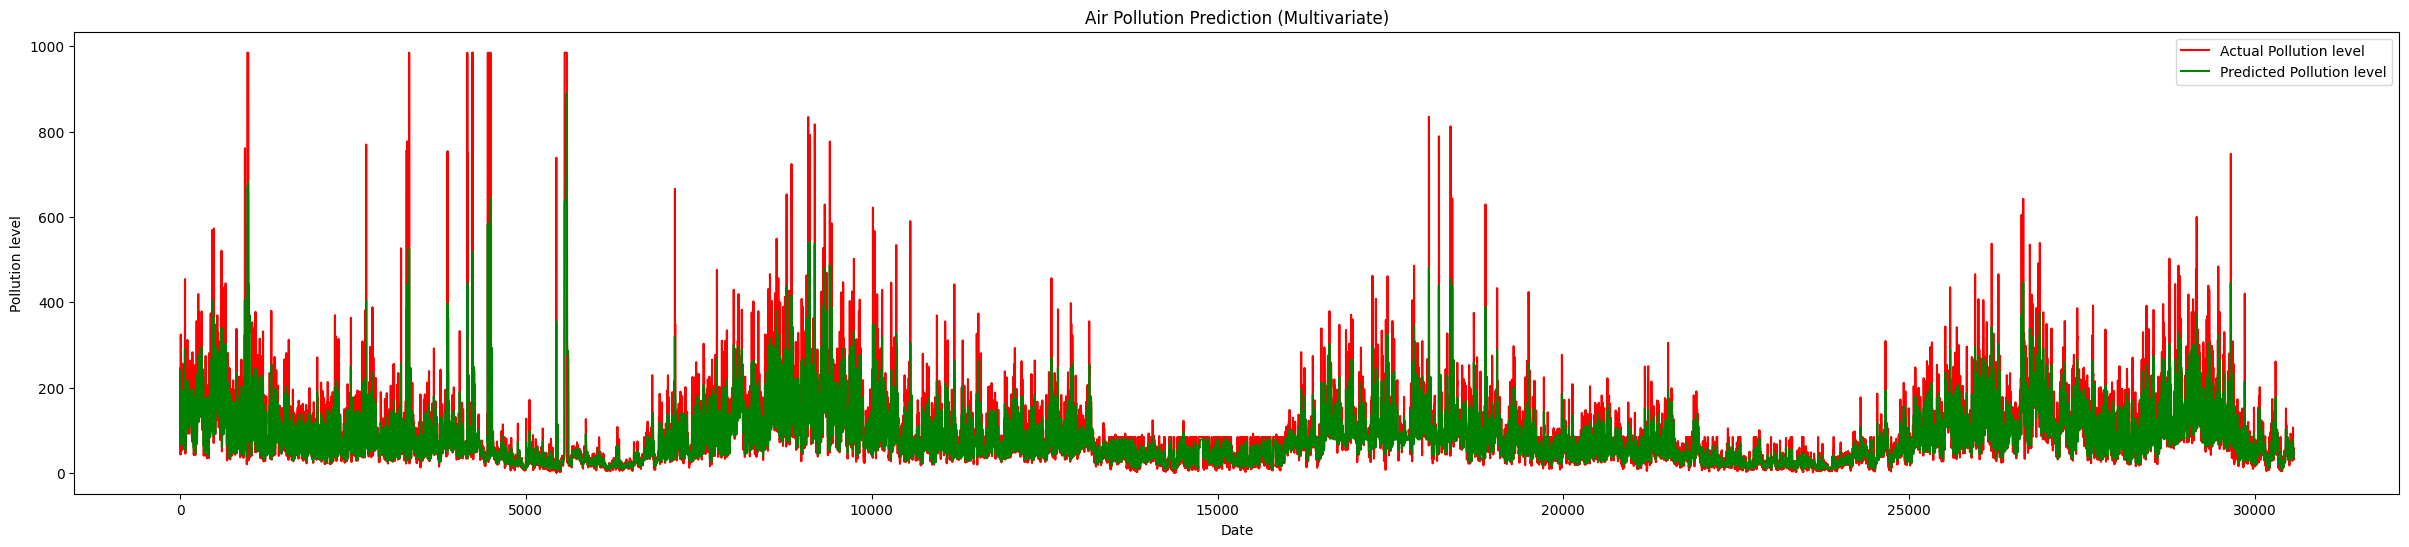

In [20]:
plt.figure(figsize=(30,6))  
plt.plot(test_data_actual_pollution , color = 'red', label = 'Actual Pollution level')
plt.plot(rescaled_prediction_pollution, color= 'green', label = 'Predicted Pollution level')

plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()

In [21]:
from math import sqrt
rmse = sqrt(mean_squared_error(rescaled_prediction_pollution,test_data_actual_pollution))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 39.474


In [22]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test_data_actual_pollution,rescaled_prediction_pollution)
print('Test MAE: %.3f' % mae)

Test MAE: 19.972


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(test_data_actual_pollution,rescaled_prediction_pollution)
print('Test MAPE: %.3f' % mape)

Test MAPE: 0.289


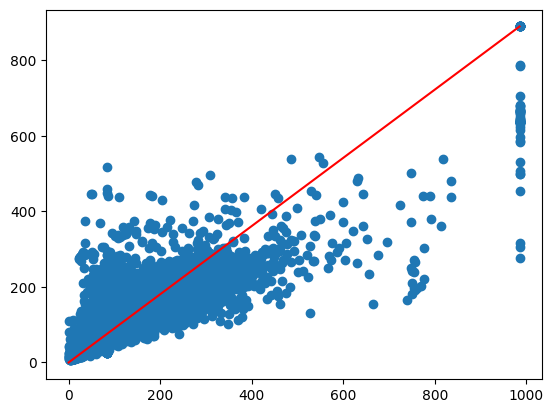

In [24]:
df1=pd.DataFrame()
df1['actual'] = pd.DataFrame(test_data_actual_pollution)
df1['predicted']=pd.DataFrame(rescaled_prediction_pollution)
plt.scatter(df1['actual'],df1['predicted'])
plt.plot([0,df1['actual'].max()],[0,df1['predicted'].max()],color='red')

In [25]:
df1=pd.DataFrame()
df1['actual'] = pd.DataFrame(test_data_actual_pollution)
df1['BiL_P_train']=pd.DataFrame(rescaled_prediction_pollution)
df1

actual  BiL_P_train
0      244.250000   148.919505
1      167.000000   116.606496
2      131.250000    94.625685
3      110.750000    93.973166
4      125.750008    86.044862
...           ...          ...
30557   37.000000    42.114204
30558   40.250000    44.336862
30559   40.500000    51.766795
30560   58.250000    44.023647
30561   39.500000    45.643626

[30562 rows x 2 columns]

# 1D CNN

In [26]:
from keras.layers.convolutional import MaxPooling1D, Conv1D
from tensorflow.keras.layers import Flatten

In [27]:
def my_checkpoint(Model):
    mc = ModelCheckpoint('Model_' +'best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    return mc

In [28]:
mc=my_checkpoint(LSTM)
#Define Model 
model = tf.keras.models.Sequential() # intialize the model

In [29]:
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n_input, n_features), kernel_regularizer=l1(0.002), bias_regularizer=l1(0.08)))
#model.add(Dropout(0.3))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', bias_regularizer=l1(0.08)))
#BatchNormalization()
model.add(MaxPooling1D(pool_size=1))
#model.add(Dropout(0.3))
model.add(Flatten())
#model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))

In [30]:
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 256)           768       
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 128)           65664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2816)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                180288    
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                      

In [31]:
history = model.fit(train_generator, validation_data=train_generator, epochs=500, steps_per_epoch=32, shuffle=True,callbacks=[es] )

Epoch 1/500


2023-03-29 17:50:03.137354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


30/32 [===========================>..] - ETA: 0s - loss: 0.0592

2023-03-29 17:50:04.372902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 7s 201ms/step - loss: 0.0579 - val_loss: 0.0404
Epoch 2/500
32/32 [==============================] - 8s 243ms/step - loss: 0.0406 - val_loss: 0.0262
Epoch 3/500
32/32 [==============================] - 732s 24s/step - loss: 0.0184 - val_loss: 0.0155
Epoch 4/500
32/32 [==============================] - 8s 255ms/step - loss: 0.0116 - val_loss: 0.0128
Epoch 5/500
32/32 [==============================] - 7s 210ms/step - loss: 0.0124 - val_loss: 0.0115
Epoch 6/500
32/32 [==============================] - 6s 201ms/step - loss: 0.0117 - val_loss: 0.0108
Epoch 7/500
32/32 [==============================] - 6s 193ms/step - loss: 0.0083 - val_loss: 0.0104
Epoch 8/500
32/32 [==============================] - 6s 192ms/step - loss: 0.0079 - val_loss: 0.0088
Epoch 9/500
32/32 [==============================] - 6s 194ms/step - loss: 0.0073 - val_loss: 0.0095
Epoch 10/500
32/32 [==============================] - 6s 193ms/step - loss: 0.0079 - val_loss: 0.0079
E

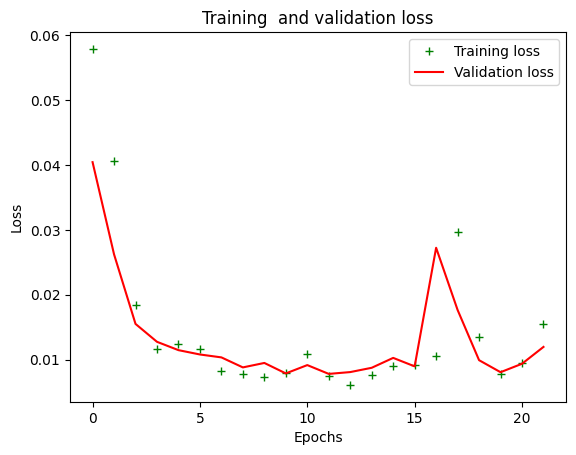

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, 'g+', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training  and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
prediction=model.predict(train_generator)
prediction.shape

  25/3057 [..............................] - ETA: 6s  

2023-03-29 18:04:27.805539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3057/3057 [==============================] - 8s 2ms/step


(30562, 1)

In [34]:
from keras.layers import concatenate
print(train.shape)
test1=train[n_input:,:]
print(test1.shape)
print(type(test1))
print(type(prediction))
prediction1 = concatenate((prediction,test1), axis=1)

(30586, 1)
(30562, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [35]:
rescaled_prediction = scaler.inverse_transform(prediction1)
print('rescaled_prediction shape', rescaled_prediction.shape)
#print(rescaled_prediction[-5:,0])
#print(rescaled_prediction[:,0])
rescaled_prediction_pollution=rescaled_prediction[:len(rescaled_prediction),0]
print(rescaled_prediction_pollution.shape)

test_data_actual_scale=scaler.inverse_transform(train)
print('test_data_actual_scale shape', test_data_actual_scale.shape)
test_data_actual_pollution=test_data_actual_scale[22:len(rescaled_prediction)+22,0]
#test_data_actual_pollution=test_data_actual_scale[0:30,0]
print(test_data_actual_pollution.shape)

rescaled_prediction shape (30562, 2)
(30562,)
test_data_actual_scale shape (30586, 1)
(30562,)


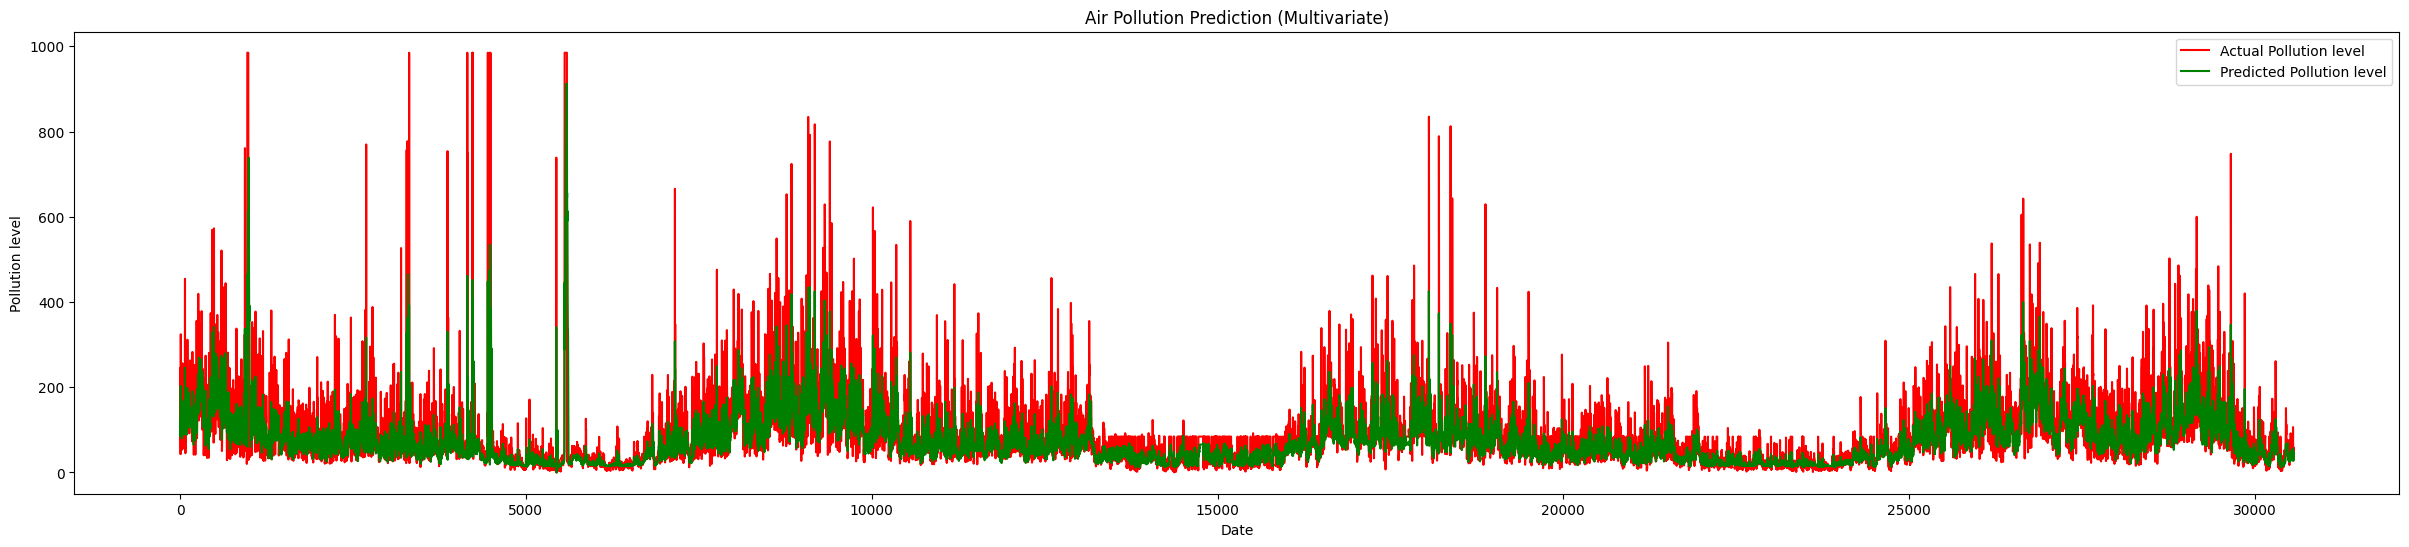

In [36]:
plt.figure(figsize=(30,6))  
plt.plot(test_data_actual_pollution , color = 'red', label = 'Actual Pollution level')
plt.plot(rescaled_prediction_pollution, color= 'green', label = 'Predicted Pollution level')

plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()

In [37]:
from math import sqrt
rmse = sqrt(mean_squared_error(rescaled_prediction_pollution,test_data_actual_pollution))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 57.902


In [38]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test_data_actual_pollution,rescaled_prediction_pollution)
print('Test MAE: %.3f' % mae)

Test MAE: 31.797


In [39]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(test_data_actual_pollution,rescaled_prediction_pollution)
print('Test MAPE: %.3f' % mape)

Test MAPE: 0.426


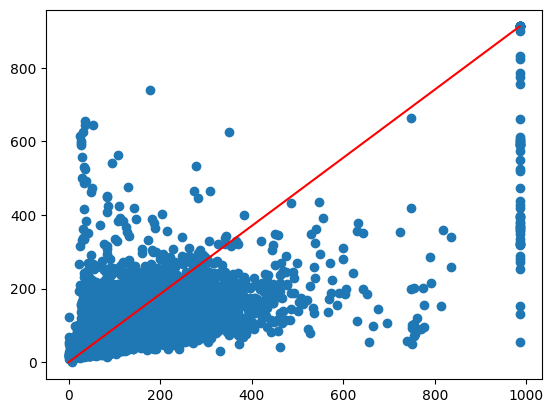

In [40]:
df1=pd.DataFrame()
df1['actual'] = pd.DataFrame(test_data_actual_pollution)
df1['predicted']=pd.DataFrame(rescaled_prediction_pollution)
plt.scatter(df1['actual'],df1['predicted'])
plt.plot([0,df1['actual'].max()],[0,df1['predicted'].max()],color='red')

In [58]:
df1['1d_cnn_actual'] = pd.DataFrame(test_data_actual_pollution)
df1['1d_cnn_P_train']=pd.DataFrame(rescaled_prediction_pollution)
df1

actual   predicted  gru_actual  gru_P_train  1d_cnn_actual  \
0      244.250000  171.769862  244.250000   171.769862     244.250000   
1      167.000000  141.083691  167.000000   141.083691     167.000000   
2      131.250000  114.785154  131.250000   114.785154     131.250000   
3      110.750000  110.225205  110.750000   110.225205     110.750000   
4      125.750008  110.340909  125.750008   110.340909     125.750008   
...           ...         ...         ...          ...            ...   
30557   37.000000   54.411553   37.000000    54.411553      37.000000   
30558   40.250000   56.459771   40.250000    56.459771      40.250000   
30559   40.500000   61.864256   40.500000    61.864256      40.500000   
30560   58.250000   59.641693   58.250000    59.641693      58.250000   
30561   39.500000   59.283745   39.500000    59.283745      39.500000   

       1d_cnn_P_train  
0          171.769862  
1          141.083691  
2          114.785154  
3          110.225205  
4          110.340909  
...               ...  
30557       54.411553  
30558       56.459771  
30559       61.864256  
30560       59.641693  
30561       59.283745  

[30562 rows x 6 columns]

# GRU

In [42]:
from tensorflow.keras.layers import Dense, Dropout, Flatten,LSTM,GRU

In [43]:
def my_checkpoint(Model):
    mc = ModelCheckpoint('Model_' +'best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    return mc

In [44]:
mc=my_checkpoint(LSTM)
#Define Model 
model = tf.keras.models.Sequential() # intialize the model

In [45]:
# Input layer
model.add(GRU (units = 256,  return_sequences = True,input_shape = (n_input, n_features),kernel_regularizer=l1(0.002), bias_regularizer=l1(0.05)))
model.add(Dropout(0.2)) 
    # Hidden layer
model.add(GRU(units = 128, bias_regularizer=l1(0.5)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()
history = model.fit(train_generator, validation_data=train_generator, epochs=500, steps_per_epoch=32, shuffle=True,callbacks=[es] )

2023-03-29 18:04:37.847146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-29 18:04:37.849160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-29 18:04:37.850510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           198912    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


2023-03-29 18:04:38.114917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-29 18:04:38.116875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-29 18:04:38.118238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

32/32 [==============================] - ETA: 0s - loss: 0.1656

2023-03-29 18:04:45.059165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-03-29 18:04:45.407403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-29 18:04:45.410448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_gra

32/32 [==============================] - 34s 918ms/step - loss: 0.1656 - val_loss: 0.1050
Epoch 2/500
32/32 [==============================] - 29s 933ms/step - loss: 0.0885 - val_loss: 0.0875
Epoch 3/500
32/32 [==============================] - 29s 918ms/step - loss: 0.0737 - val_loss: 0.0735
Epoch 4/500
32/32 [==============================] - 28s 909ms/step - loss: 0.0687 - val_loss: 0.0666
Epoch 5/500
32/32 [==============================] - 28s 900ms/step - loss: 0.0682 - val_loss: 0.0768
Epoch 6/500
32/32 [==============================] - 28s 908ms/step - loss: 0.0703 - val_loss: 0.0683
Epoch 7/500
32/32 [==============================] - 29s 926ms/step - loss: 0.0678 - val_loss: 0.0643
Epoch 8/500
32/32 [==============================] - 28s 917ms/step - loss: 0.0683 - val_loss: 0.0741
Epoch 9/500
32/32 [==============================] - 30s 958ms/step - loss: 0.0694 - val_loss: 0.0668
Epoch 10/500
32/32 [==============================] - 31s 1s/step - loss: 0.0668 - val_loss: 0

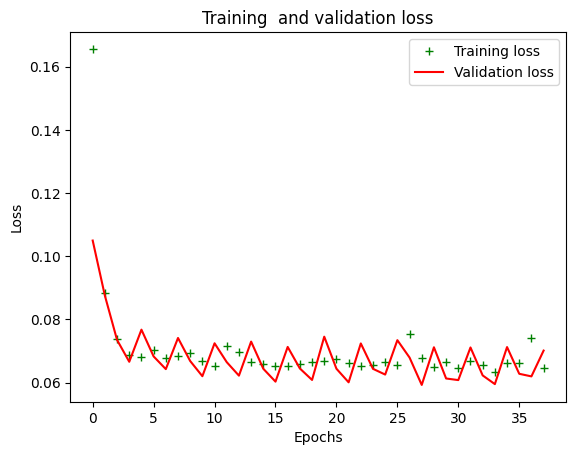

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, 'g+', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training  and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
prediction=model.predict(train_generator)
prediction.shape

2023-03-29 18:24:05.346919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-03-29 18:24:05.679787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-29 18:24:05.682504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_gra

3057/3057 [==============================] - 35s 11ms/step


(30562, 1)

In [48]:
from keras.layers import concatenate
print(train.shape)
test1=train[n_input:,:]
print(test1.shape,type(test1))
print(type(prediction))
prediction1= concatenate((prediction,test1),axis=1)


(30586, 1)
(30562, 1) <class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [49]:
rescaled_prediction = scaler.inverse_transform(prediction1)
print('rescaled_prediction shape', rescaled_prediction.shape)
#print(rescaled_prediction[-5:,0])
#print(rescaled_prediction[:,0])
rescaled_prediction_pollution=rescaled_prediction[:len(rescaled_prediction),0]
print(rescaled_prediction_pollution.shape)

test_data_actual_scale=scaler.inverse_transform(train)
print('test_data_actual_scale shape', test_data_actual_scale.shape)
test_data_actual_pollution=test_data_actual_scale[22:len(rescaled_prediction)+22,0]
#test_data_actual_pollution=test_data_actual_scale[0:30,0]
print(test_data_actual_pollution.shape)

rescaled_prediction shape (30562, 2)
(30562,)
test_data_actual_scale shape (30586, 1)
(30562,)


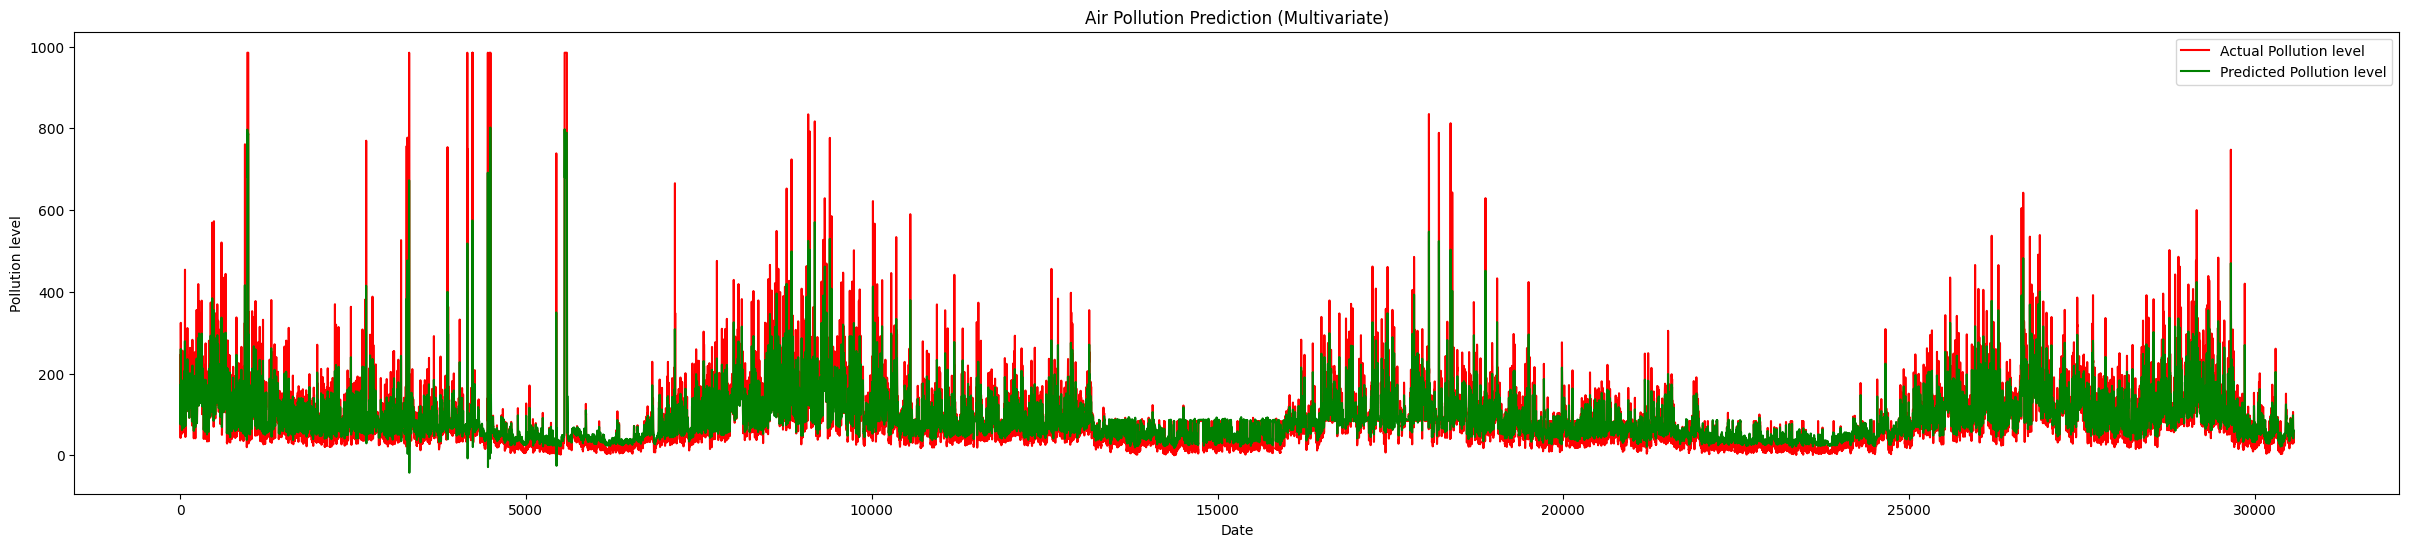

In [50]:
plt.figure(figsize=(30,6))  
plt.plot(test_data_actual_pollution , color = 'red', label = 'Actual Pollution level')
plt.plot(rescaled_prediction_pollution, color= 'green', label = 'Predicted Pollution level')

plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()

In [51]:
from math import sqrt
rmse = sqrt(mean_squared_error(rescaled_prediction_pollution,test_data_actual_pollution))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 29.528


In [52]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test_data_actual_pollution,rescaled_prediction_pollution)
print('Test MAE: %.3f' % mae)

Test MAE: 17.375


In [53]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(test_data_actual_pollution,rescaled_prediction_pollution)
print('Test MAPE: %.3f' % mape)

Test MAPE: 0.423


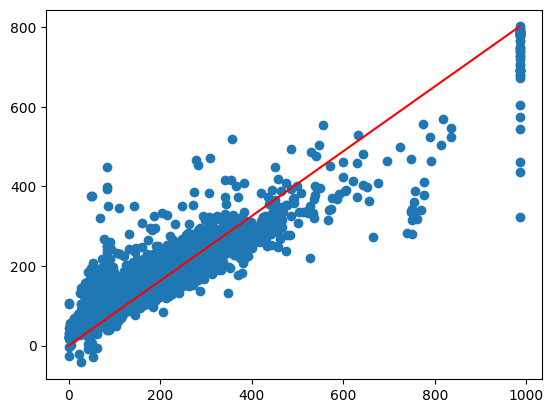

In [54]:
df1=pd.DataFrame()
df1['actual'] = pd.DataFrame(test_data_actual_pollution) # x axis
df1['predicted']=pd.DataFrame(rescaled_prediction_pollution) # y axis
plt.scatter(df1['actual'],df1['predicted'])
plt.plot([0,df1['actual'].max()],[0,df1['predicted'].max()],color='red')

In [55]:
df1['gru_actual'] = pd.DataFrame(test_data_actual_pollution)
df1['gru_P_train']=pd.DataFrame(rescaled_prediction_pollution)
df1

actual   predicted  gru_actual  gru_P_train
0      244.250000  171.769862  244.250000   171.769862
1      167.000000  141.083691  167.000000   141.083691
2      131.250000  114.785154  131.250000   114.785154
3      110.750000  110.225205  110.750000   110.225205
4      125.750008  110.340909  125.750008   110.340909
...           ...         ...         ...          ...
30557   37.000000   54.411553   37.000000    54.411553
30558   40.250000   56.459771   40.250000    56.459771
30559   40.500000   61.864256   40.500000    61.864256
30560   58.250000   59.641693   58.250000    59.641693
30561   39.500000   59.283745   39.500000    59.283745

[30562 rows x 4 columns]

In [61]:
df1.to_csv('f.csv')